# Projectile Motion with Air Resistance
This notebook seeks to generate various graphs to describe the 2D motion of a projectile experiencing a force of air resistance proportional to its speed squared ( $D=bv^{2}$ ) in the direction opposite its motion. Instead of symbolically solving the motion equations, the program generates the data points by incrementing by a small time interval $dt$. In such short intervals, acceleration is modeled as being constant. That acceleration value is then used to determine the next positon ( $\Delta s=v_0 \Delta t + \frac{1}{2}a(\Delta t)^{2}$ ) and velocity ( $\Delta v = v_0+at$ ). That new velocity value is used to determine the new acceleration value ( $a=\frac{\Sigma F}{m}$ ). This cycle repeats, generating data points until the projectile reaches $y = 0$. All units used are standard SI.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Starting Conditions / Constants

In [2]:
# initial height
y_0 = 1
# initial speed
v_0 = 20
# initial velocity angle in degrees above horizontal
theta_0 = 30
# mass of the object
m = 2.0
# coefficient for drag
b = 0.2
# acceleration due to gravity
g = np.array([0, 9.8])

# starting angle converted to radians
theta_0 *= math.pi / 180
# x and y components of the ininial velocity
v_0x = v_0 * math.cos(theta_0)
v_0y = v_0 * math.sin(theta_0)

## Motion Equations

In [3]:
# the small time value to increment by
dt = 0.0001

# change in velocity as a function of acceleration (and dt)
dv = lambda a: a * dt
# change in position as a function of velocity and acceleration (and dt)
ds = lambda v, a: v*dt + 0.5 * a * dt**2
# acceleration as a function of velocity (and m, b, & g)
def a(v):
    a_part = -b / m * math.sqrt(np.sum(v**2))
    return a_part * v - g

## Data Point Generation

In [4]:
# start an array of time values
times = np.array([0.])
# start of an array of [x, y] positions
positions = np.array([[0., y_0]])
# start of an array of [v_x, v_y] velocities
velocities = np.array([[v_0x, v_0y]])
# start of an array of [a_x, a_y] accelerations
accelerations = np.array([a(velocities[0])])

i = 0
while positions[i, 1] >= 0:
    npos = positions[i] + ds(velocities[i], accelerations[i])
    times = np.append(times, (i+1) * dt)
    positions = np.append(positions, [npos], axis=0)
    velocities = np.append(velocities, [velocities[i] + dv(accelerations[i])], axis=0)
    accelerations = np.append(accelerations, [a(velocities[i+1])], axis=0)
    i += 1

## Graphs

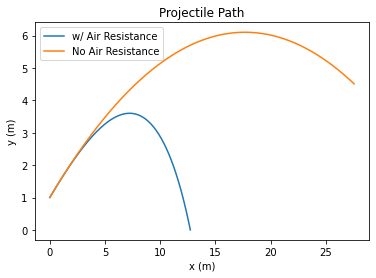

In [5]:
# Values for no air resistance
x_no_air = v_0x * times
y_no_air = y_0 + v_0y * times - 0.5 * g[1] * times**2

# Function to help plot comparisons to no air resistance
def air_vs_no_air_plotter(ax, data1_air, data2_air, data1_no_air, data2_no_air, xlabel: str, ylabel: str, title: str):
    ax.plot(data1_air, data2_air, label='w/ Air Resistance')
    ax.plot(data1_no_air, data2_no_air, label='No Air Resistance')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

# Projectile Paths
projectile_path_fig, projectile_path_ax = plt.subplots()
air_vs_no_air_plotter(projectile_path_ax, positions[:, 0], positions[:, 1], x_no_air, y_no_air, 'x (m)', 'y (m)', 'Projectile Path')

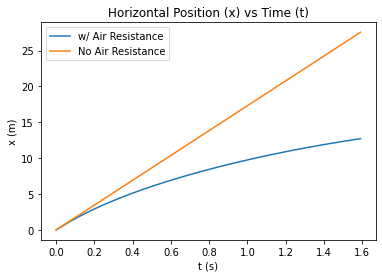

In [6]:
# Horizontal Position (x) vs Time (t)
x_time_fig, x_time_ax = plt.subplots()
air_vs_no_air_plotter(x_time_ax, times, positions[:, 0], times, x_no_air, 't (s)', 'x (m)', 'Horizontal Position (x) vs Time (t)')

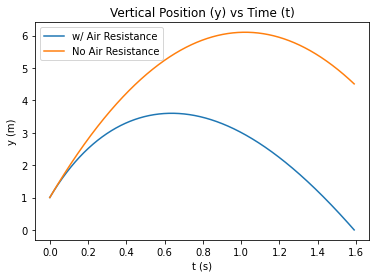

In [7]:
# Vertical Position (y) vs Time (t)
y_time_fig, y_time_ax = plt.subplots()
air_vs_no_air_plotter(y_time_ax, times, positions[:, 1], times, y_no_air, 't (s)', 'y (m)', 'Vertical Position (y) vs Time (t)')

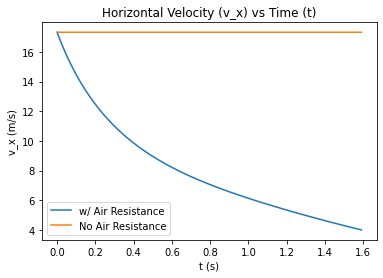

In [8]:
# Horizontal Velocity (v_x) vs Time (t)
v_x_time_fig, v_x_time_ax = plt.subplots()
air_vs_no_air_plotter(v_x_time_ax, times, velocities[:, 0], times, v_0x * np.ones_like(times), 't (s)', 'v_x (m/s)', 'Horizontal Velocity (v_x) vs Time (t)')

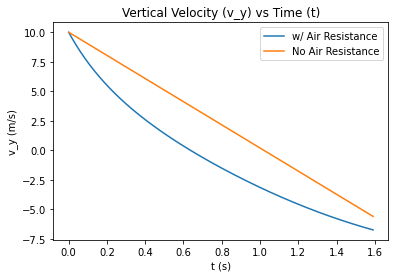

In [9]:
# Vertical Velocity (v_y) vs Time (t)
v_y_time_fig, v_y_time_ax = plt.subplots()
air_vs_no_air_plotter(v_y_time_ax, times, velocities[:, 1], times, v_0y - g[1] * times, 't (s)', 'v_y (m/s)', 'Vertical Velocity (v_y) vs Time (t)')

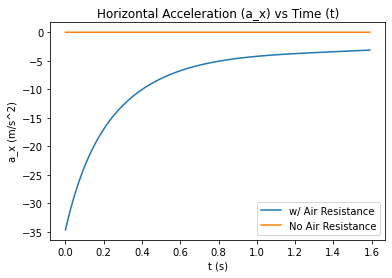

In [10]:
# Horizontal Acceleration (a_x) vs Time (t)
a_x_time_fig, a_x_time_ax = plt.subplots()
air_vs_no_air_plotter(a_x_time_ax, times, accelerations[:, 0], times, np.zeros_like(times), 't (s)', 'a_x (m/s^2)', 'Horizontal Acceleration (a_x) vs Time (t)')

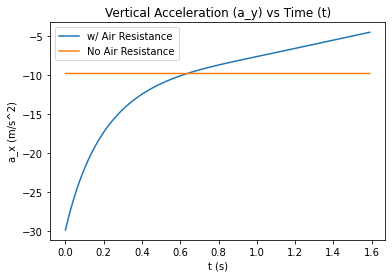

In [11]:
# Vertical Acceleration (a_y) vs Time (t)
a_y_time_fig, a_y_time_ax = plt.subplots()
air_vs_no_air_plotter(a_y_time_ax, times, accelerations[:, 1], times, -g[1] * np.ones_like(times), 't (s)', 'a_x (m/s^2)', 'Vertical Acceleration (a_y) vs Time (t)')

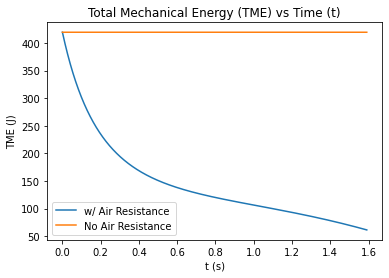

In [12]:
# Total Mechanical Energy (TME) vs Time (t)
tme_air = 0.5 * m * np.sum(velocities**2, axis=1) + (m * g[1] * positions[:, 1])
tme_no_air = 0.5 * m * (v_0x**2 + (v_0y - g[1] * times)**2) + (m * g[1] * y_no_air)
tme_time_fig, tme_time_ax = plt.subplots()
air_vs_no_air_plotter(tme_time_ax, times, tme_air, times, tme_no_air, 't (s)', 'TME (J)', 'Total Mechanical Energy (TME) vs Time (t)')